# <u> Supervised Learning Final Project </u>
### Car Price Predictions

 <u>Course</u>: CSCA 5622 Introduction to Machine Learning

 <u>Github</u>: [Repository](https://github.com/trle4386/supervised_learning_final_project/tree/main)

 <u>Author</u>: Tri Le  


## **Step 1: Gather Data**
I have found a data set off of Kaggle to use for this project. The dataset can be found [here](https://www.kaggle.com/datasets/rehan497/car-price-prediction-dataset)

The data set contains around 2500 entries of cars, their price, and their relevant specs

## **Step 2: Identify a Machine Learning Problem**

Given a dataset of car prices and relevant information about each car, develop a model that can predict the price of a car, given the other relevant information

## **Step 3: EDA (Data Analysis)**

Import any necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv('./data/car_price_prediction_.csv')

<u>Initial Data Inspection</u>

In [3]:
print("\nDataset Shape:", df.shape)
print(f"\nNumber of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

print("\n" + "-"*80)
print("First few rows:")
print(df.head(10))


Dataset Shape: (2500, 10)

Number of records: 2500
Number of features: 10

--------------------------------------------------------------------------------
First few rows:
   Car ID  Brand  Year  Engine Size Fuel Type Transmission  Mileage Condition  \
0       1  Tesla  2016          2.3    Petrol       Manual   114832       New   
1       2    BMW  2018          4.4  Electric       Manual   143190      Used   
2       3   Audi  2013          4.5  Electric       Manual   181601       New   
3       4  Tesla  2011          4.1    Diesel    Automatic    68682       New   
4       5   Ford  2009          2.6    Diesel       Manual   223009  Like New   
5       6   Audi  2019          2.4    Diesel    Automatic   246553  Like New   
6       7   Audi  2020          4.0  Electric    Automatic   135486      Used   
7       8  Tesla  2017          5.3    Hybrid    Automatic    83030       New   
8       9  Honda  2023          5.7  Electric       Manual   120360  Like New   
9      10   Ford 

In [4]:
print("Data Types and Non-Null Counts:")
print(df.info())

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB
None


In [5]:
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
           Car ID       Year  Engine Size        Mileage         Price
count  2500.00000  2500.0000  2500.000000    2500.000000   2500.000000
mean   1250.50000  2011.6268     3.465240  149749.844800  52638.022532
std     721.83216     6.9917     1.432053   87919.952034  27295.833455
min       1.00000  2000.0000     1.000000      15.000000   5011.270000
25%     625.75000  2005.0000     2.200000   71831.500000  28908.485000
50%    1250.50000  2012.0000     3.400000  149085.000000  53485.240000
75%    1875.25000  2018.0000     4.700000  225990.500000  75838.532500
max    2500.00000  2023.0000     6.000000  299967.000000  99982.590000


<u>Testing for Missing Data </u>

In [6]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("\nMissing Data Summary:")
    print(missing_df)
    
    # Visualize missing data
    plt.figure(figsize=(10, 6))
    missing_df['Percentage'].plot(kind='bar', color='coral')
    plt.title('Percentage of Missing Data by Feature', fontsize=14, fontweight='bold')
    plt.ylabel('Percentage Missing (%)')
    plt.xlabel('Features')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing data detected")

No missing data detected


<u>Perform Initial Feature Identification</u>



Car ID is an unnecessary feature, so remove. Target is Price, so remove Price

In [7]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

numerical_features.remove('Car ID')
target = 'Price'
numerical_features.remove('Price')

print(f"\nNumerical Features ({len(numerical_features)}): {numerical_features}")
print(f"Categorical Features ({len(categorical_features)}): {categorical_features}")
print(f"Target Variable: {target}")


Numerical Features (3): ['Year', 'Engine Size', 'Mileage']
Categorical Features (5): ['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model']
Target Variable: Price


TARGET VARIABLE ANALYSIS: Price

Price Statistics:
Mean: $52,638.02
Median: $53,485.24
Std Dev: $27,295.83
Min: $5,011.27
Max: $99,982.59
Range: $94,971.32


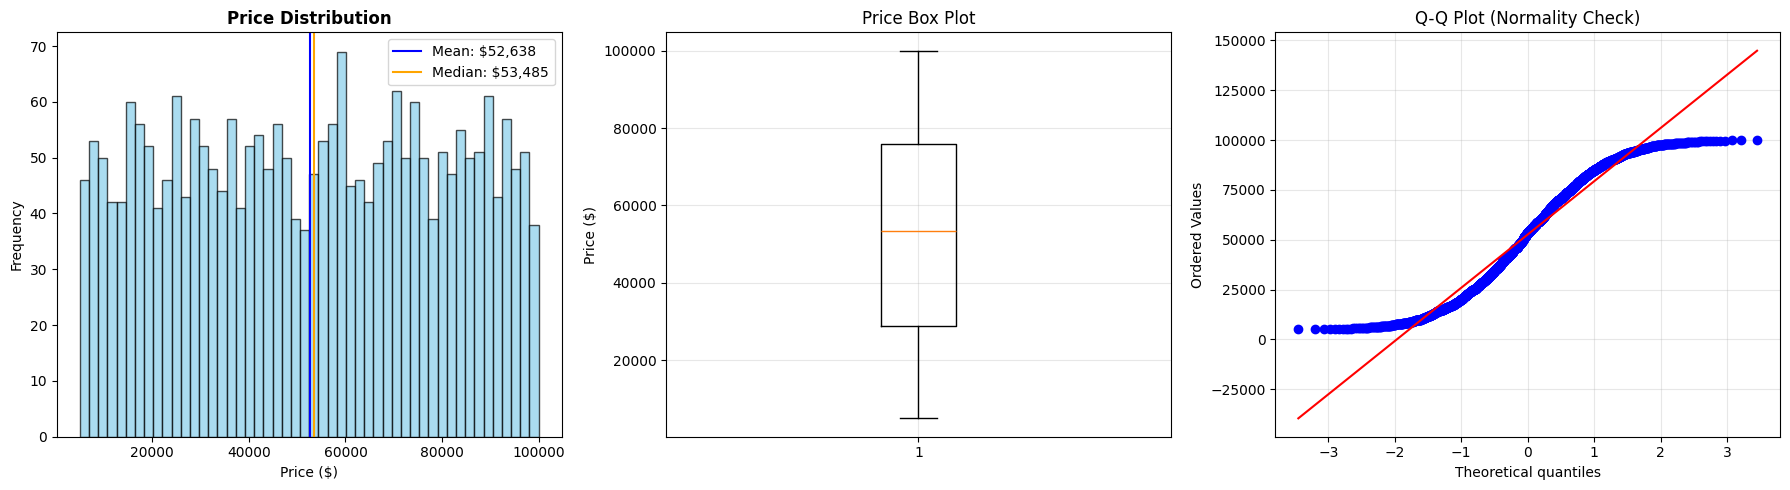

In [ ]:
print(f"TARGET VARIABLE ANALYSIS: {target}")

print(f"\nPrice Statistics:")
print(f"Mean: ${df[target].mean():,.2f}")
print(f"Median: ${df[target].median():,.2f}")
print(f"Std Dev: ${df[target].std():,.2f}")
print(f"Min: ${df[target].min():,.2f}")
print(f"Max: ${df[target].max():,.2f}")
print(f"Range: ${df[target].max() - df[target].min():,.2f}")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(df[target], bins=50, edgecolor='black', alpha=0.7, color='blue')
axes[0].set_title('Price Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df[target].mean(), color='blue', linestyle='-', label=f'Mean: ${df[target].mean():,.0f}')
axes[0].axvline(df[target].median(), color='orange', linestyle='-', label=f'Median: ${df[target].median():,.0f}')
axes[0].legend()

# Box plot
axes[1].boxplot(df[target], vert=True)
axes[1].set_title('Price Box Plot', fontsize=12)
axes[1].set_ylabel('Price ($)')
axes[1].grid(True, alpha=0.3)

# Q-Q plot (Normality)
stats.probplot(df[target], dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot (Normality Check)', fontsize=12)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Year:
count    2500.0000
mean     2011.6268
std         6.9917
min      2000.0000
25%      2005.0000
50%      2012.0000
75%      2018.0000
max      2023.0000
Name: Year, dtype: float64

Engine Size:
count    2500.000000
mean        3.465240
std         1.432053
min         1.000000
25%         2.200000
50%         3.400000
75%         4.700000
max         6.000000
Name: Engine Size, dtype: float64

Mileage:
count      2500.000000
mean     149749.844800
std       87919.952034
min          15.000000
25%       71831.500000
50%      149085.000000
75%      225990.500000
max      299967.000000
Name: Mileage, dtype: float64


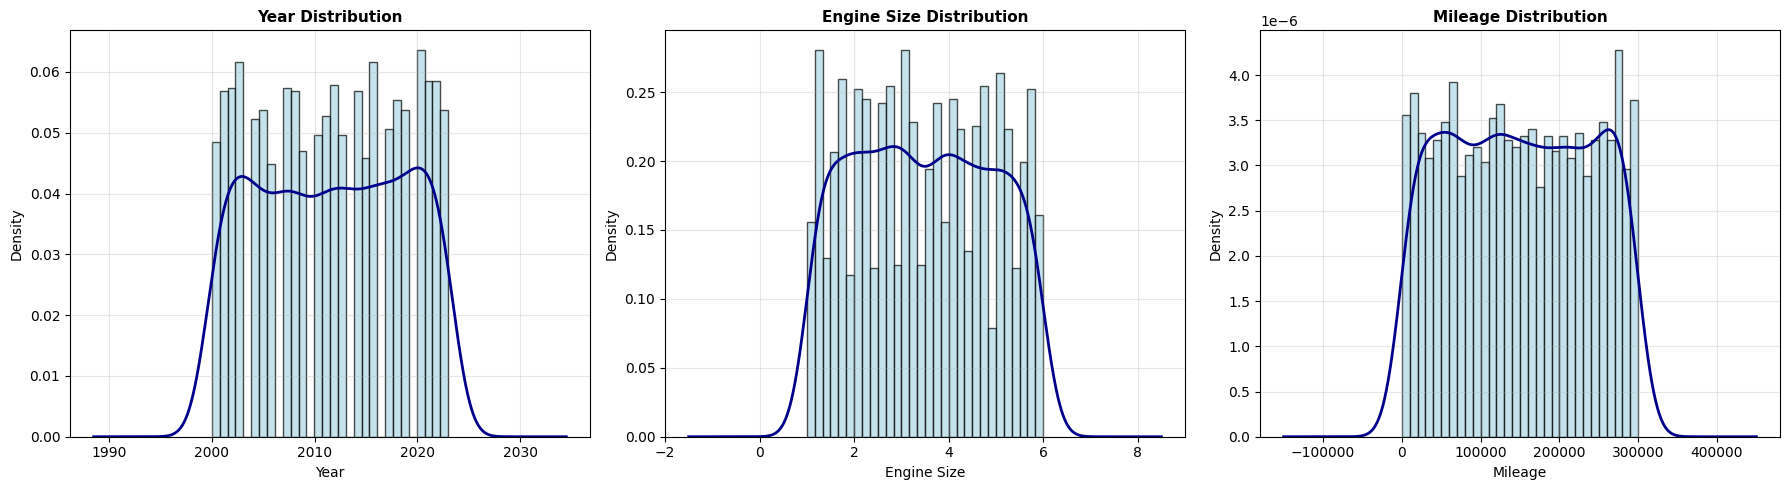

In [9]:
for feature in numerical_features:
    print(f"\n{feature}:")
    print(df[feature].describe())

n_cols = 3
n_rows = int(np.ceil(len(numerical_features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten() if len(numerical_features) > 1 else [axes]

for idx, feature in enumerate(numerical_features):
    # Histogram with KDE
    axes[idx].hist(df[feature], bins=30, edgecolor='black', alpha=0.7, density=True, color='lightblue')
    df[feature].plot(kind='kde', ax=axes[idx], secondary_y=False, color='darkblue', linewidth=2)
    axes[idx].set_title(f'{feature} Distribution', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Density')
    axes[idx].grid(True, alpha=0.3)

# Remove empty subplots
for idx in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

<u>Outlier Analysis</u>

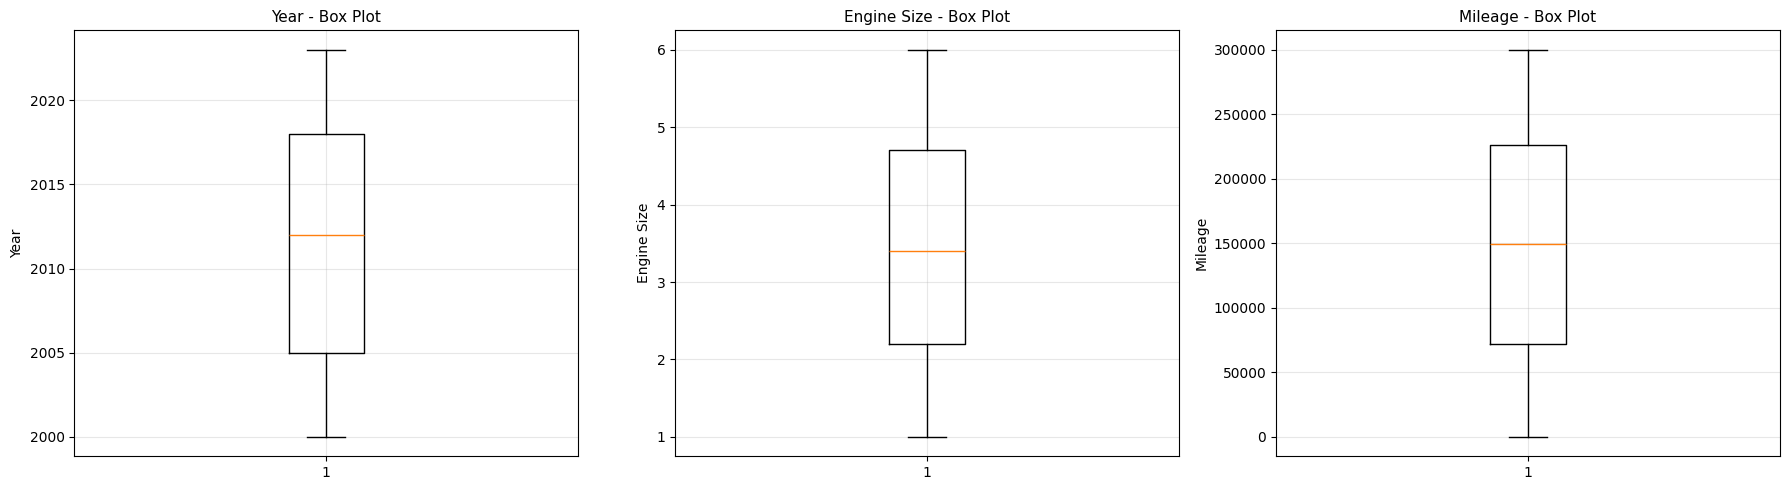

In [10]:
# Box plots for outlier detection
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten() if len(numerical_features) > 1 else [axes]

for idx, feature in enumerate(numerical_features):
    axes[idx].boxplot(df[feature], vert=True)
    axes[idx].set_title(f'{feature} - Box Plot', fontsize=11)
    axes[idx].set_ylabel(feature)
    axes[idx].grid(True, alpha=0.3)

for idx in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


This data set does not contain any glaring outliers

<u>Categorical Feature Analysis</u>

CATEGORICAL FEATURES ANALYSIS

Brand:
Brand
Toyota      374
Audi        368
BMW         358
Mercedes    353
Honda       352
Tesla       348
Ford        347
Name: count, dtype: int64
Unique values: 7

Fuel Type:
Fuel Type
Diesel      655
Petrol      630
Electric    614
Hybrid      601
Name: count, dtype: int64
Unique values: 4

Transmission:
Transmission
Manual       1308
Automatic    1192
Name: count, dtype: int64
Unique values: 2

Condition:
Condition
Used        855
Like New    836
New         809
Name: count, dtype: int64
Unique values: 3

Model:
Model
Fiesta      103
Corolla     103
A3           98
A4           96
Q7           95
CR-V         95
5 Series     93
3 Series     93
Prius        93
Model X      93
C-Class      92
X3           92
GLA          92
Camry        90
E-Class      89
Fit          89
Model Y      89
RAV4         88
Accord       88
Model 3      87
Explorer     86
Focus        81
Civic        80
X5           80
GLC          80
Q5           79
Model S      79
Mustan

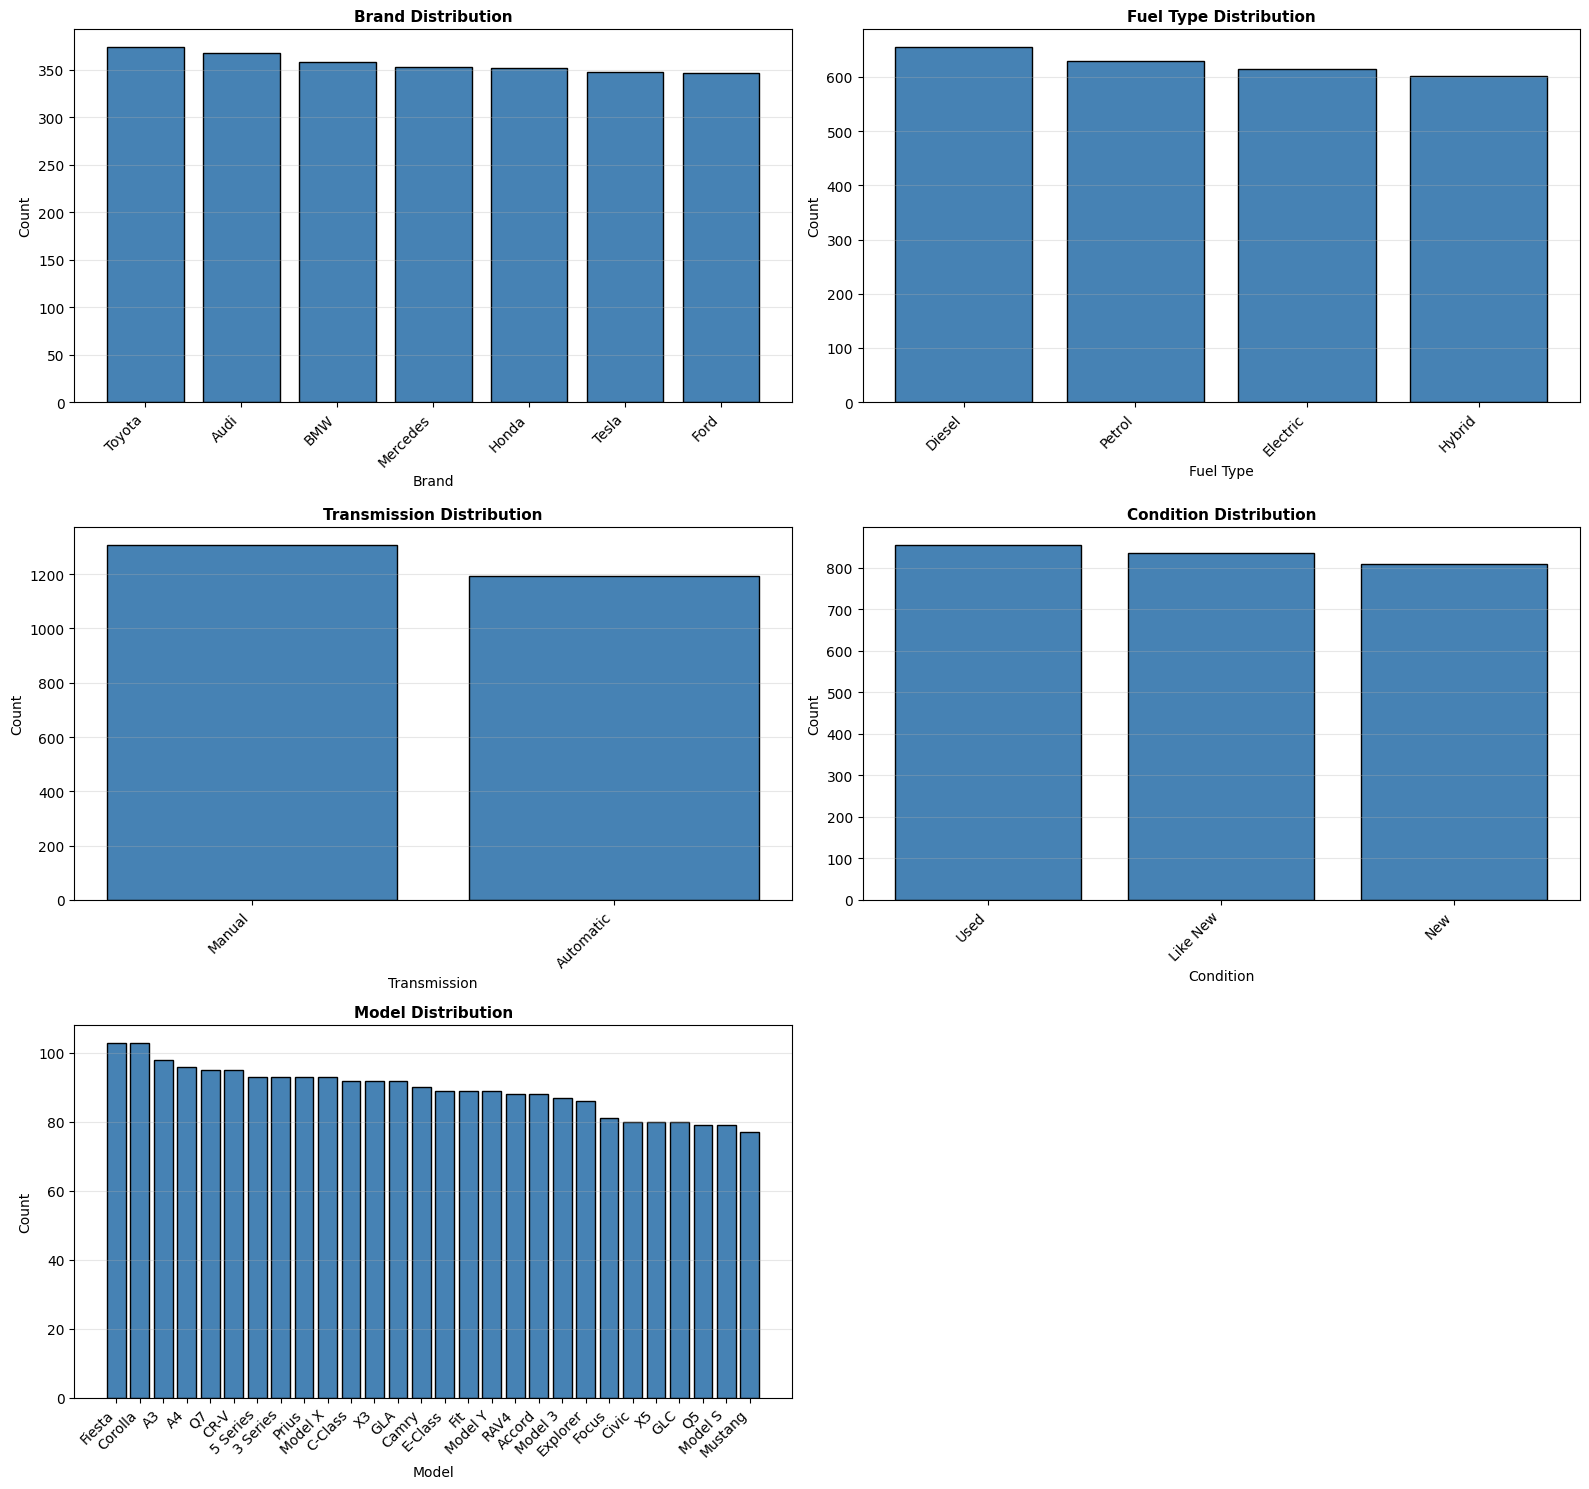

In [ ]:
print("CATEGORICAL FEATURES ANALYSIS")

for feature in categorical_features:
    print(f"\n{feature}:")
    print(df[feature].value_counts())
    print(f"Unique values: {df[feature].nunique()}")

# Visualize categorical distributions
n_cat_cols = 2
n_cat_rows = int(np.ceil(len(categorical_features) / n_cat_cols))

fig, axes = plt.subplots(n_cat_rows, n_cat_cols, figsize=(16, 5*n_cat_rows))
axes = axes.flatten() if len(categorical_features) > 1 else [axes]

for idx, feature in enumerate(categorical_features):
    value_counts = df[feature].value_counts()
    axes[idx].bar(range(len(value_counts)), value_counts.values, color='blue', edgecolor='black')
    axes[idx].set_title(f'{feature} Distribution', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Count')
    axes[idx].set_xticks(range(len(value_counts)))
    axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[idx].grid(True, alpha=0.3, axis='y')

for idx in range(len([f for f in categorical_features if f != 'Car ID']), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

<u>Initial Correlation Matrix</u>


Correlation with Target Variable (Price):
Price          1.000000
Engine Size   -0.004420
Mileage       -0.008567
Year          -0.036805
Name: Price, dtype: float64


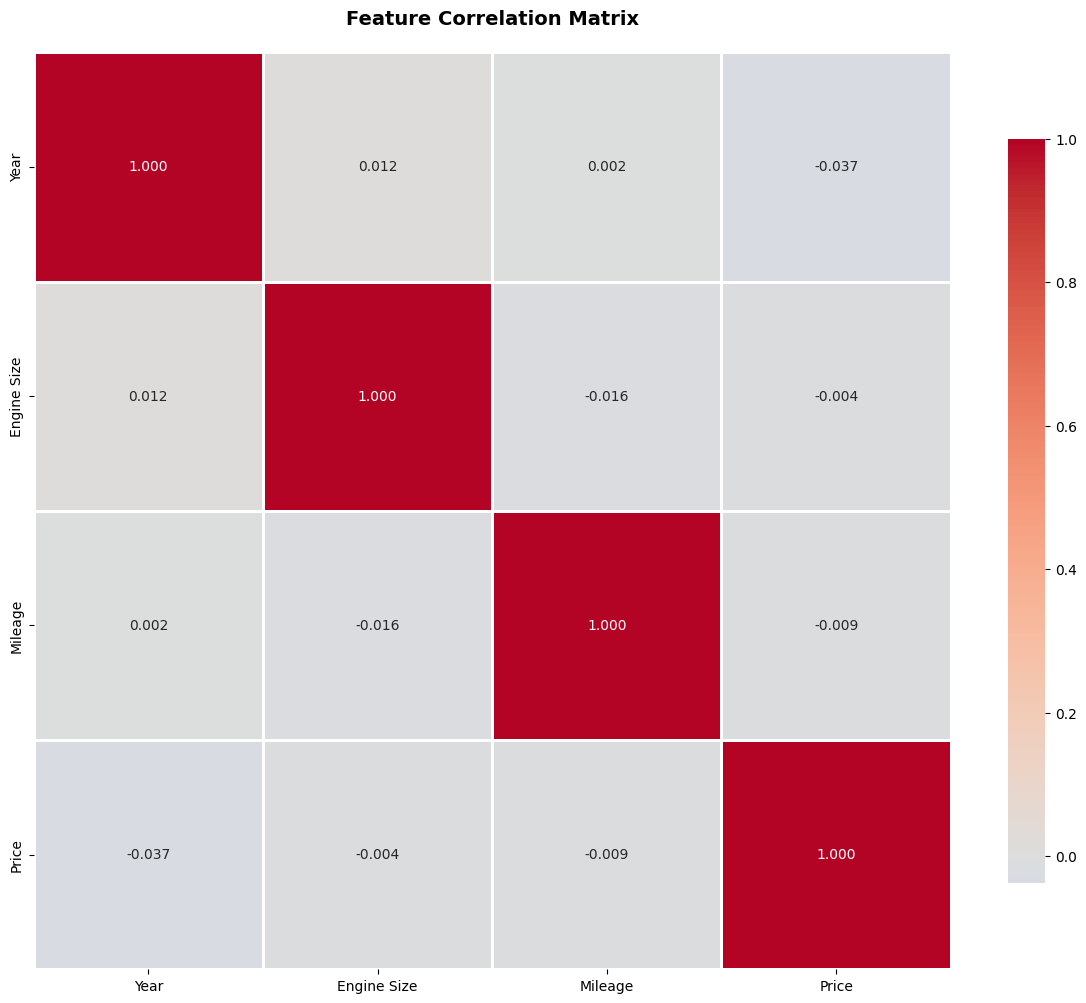


Strong Correlations (|r| > 0.5):


In [ ]:
# Numerical correlations
correlation_matrix = df[numerical_features + [target]].corr()

print("Correlation with Target Variable (Price):")
price_correlations = correlation_matrix[target].sort_values(ascending=False)
print(price_correlations)

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

<u>Price vs Numerical Feature Analysis</u>

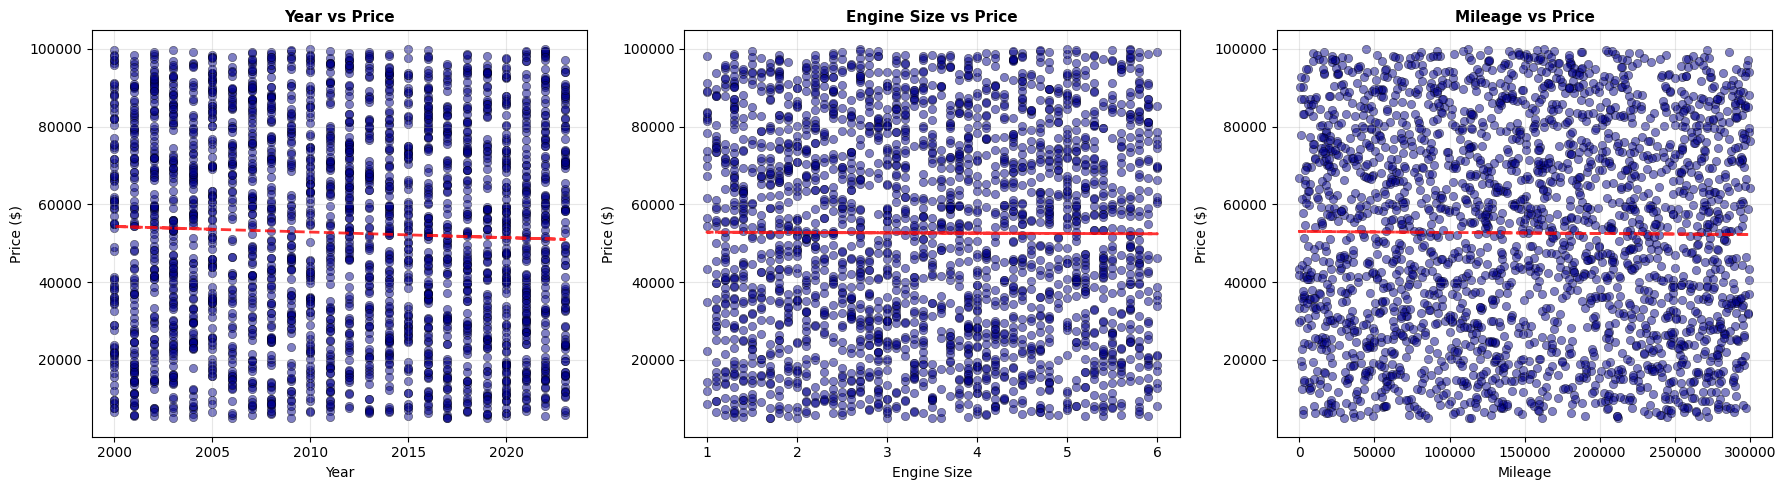

In [ ]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten() if len(numerical_features) > 1 else [axes]

for idx, feature in enumerate(numerical_features):
    axes[idx].scatter(df[feature], df[target], alpha=0.5, color='blue', edgecolors='black', linewidths=0.5)
    axes[idx].set_title(f'{feature} vs Price', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Price ($)')
    axes[idx].grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(df[feature], df[target], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2)

for idx in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


<u> Price vs Categorical Features Analysis</u>


Average Price by Brand:
Brand
BMW         54157.114385
Tesla       53475.547471
Mercedes    53191.090085
Toyota      52078.728235
Honda       52050.283949
Audi        51953.424810
Ford        51593.254813
Name: Price, dtype: float64

Average Price by Fuel Type:
Fuel Type
Diesel      54996.997588
Hybrid      52547.394759
Petrol      51767.918016
Electric    51103.013534
Name: Price, dtype: float64

Average Price by Transmission:
Transmission
Automatic    52691.684639
Manual       52589.119450
Name: Price, dtype: float64

Average Price by Condition:
Condition
Like New    53518.746376
Used        52470.919076
New         51904.509951
Name: Price, dtype: float64

Average Price by Model:
Model
GLC         59544.773750
3 Series    58561.123548
Camry       56405.516111
5 Series    55986.422796
Focus       55677.760000
Fit         55369.341236
Model 3     55142.083563
Model Y     54708.899101
Corolla     53782.605534
Q5          53432.295949
C-Class     53080.840761
Model S     52887.345823
A

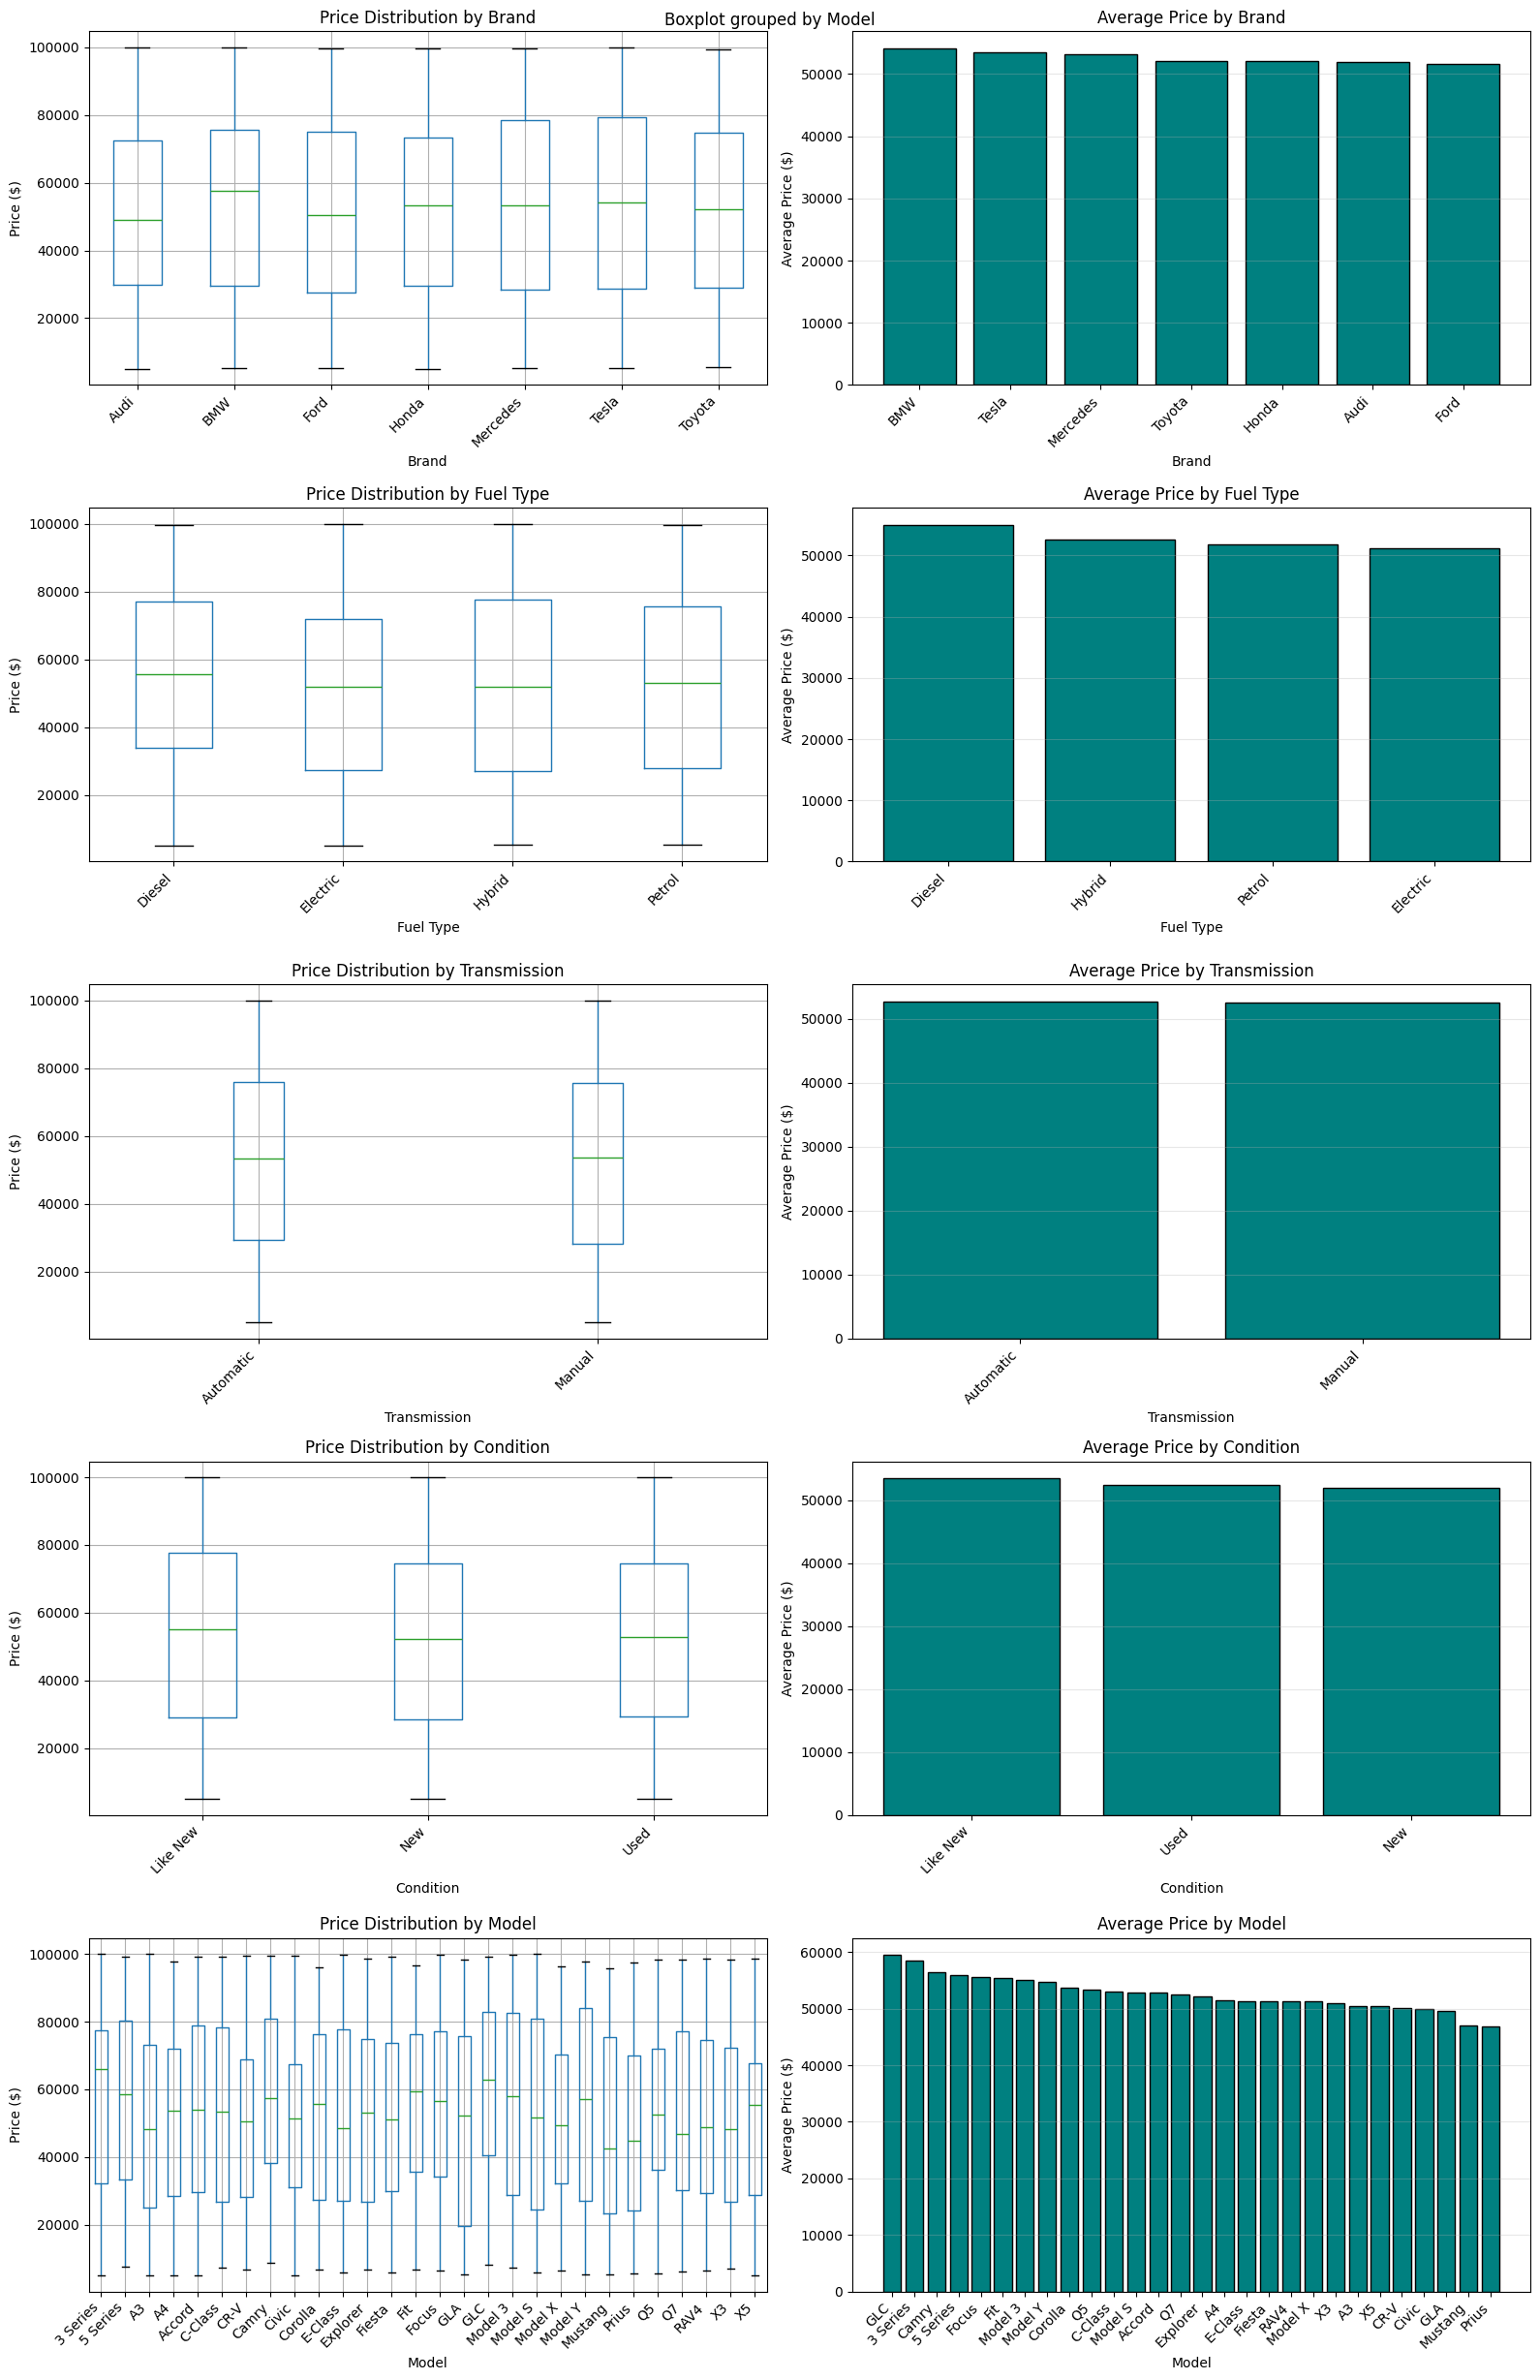

In [14]:
cat_features_to_plot = [f for f in categorical_features]

fig, axes = plt.subplots(len(cat_features_to_plot), 2, figsize=(16, 5*len(cat_features_to_plot)))
if len(cat_features_to_plot) == 1:
    axes = axes.reshape(1, -1)

for idx, feature in enumerate(cat_features_to_plot):
    # Box plot
    df.boxplot(column=target, by=feature, ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Price Distribution by {feature}')
    axes[idx, 0].set_xlabel(feature)
    axes[idx, 0].set_ylabel('Price ($)')
    plt.sca(axes[idx, 0])
    plt.xticks(rotation=45, ha='right')
    
    # Mean price by category
    mean_prices = df.groupby(feature)[target].mean().sort_values(ascending=False)
    axes[idx, 1].bar(range(len(mean_prices)), mean_prices.values, color='teal', edgecolor='black')
    axes[idx, 1].set_title(f'Average Price by {feature}')
    axes[idx, 1].set_xlabel(feature)
    axes[idx, 1].set_ylabel('Average Price ($)')
    axes[idx, 1].set_xticks(range(len(mean_prices)))
    axes[idx, 1].set_xticklabels(mean_prices.index, rotation=45, ha='right')
    axes[idx, 1].grid(True, alpha=0.3, axis='y')
    
    print(f"\nAverage Price by {feature}:")
    print(mean_prices)

plt.tight_layout()
plt.show()

<u>Feature Engineering</u>

Since the dataset was so clean to begin with, I decided to add to my EDA process by adding some features that I felt may be useful.

In [15]:
# Create additional features
df['Car Age'] = 2025 - df['Year']
df['Price per Mile'] = df['Price'] / (df['Mileage'] + 1)  # +1 to avoid division by zero

# Create mileage categories
df['Mileage Category'] = pd.cut(df['Mileage'], 
                                 bins=[0, 50000, 100000, 150000, 300000],
                                 labels=['Low', 'Medium', 'High', 'Very High'])

print("New Features Created:")
print(df[['Car Age', 'Price per Mile', 'Mileage Category']].head())

New Features Created:
   Car Age  Price per Mile Mileage Category
0        9        0.231762             High
1        7        0.102518             High
2       12        0.244505        Very High
3       14        1.257579           Medium
4       16        0.329927        Very High


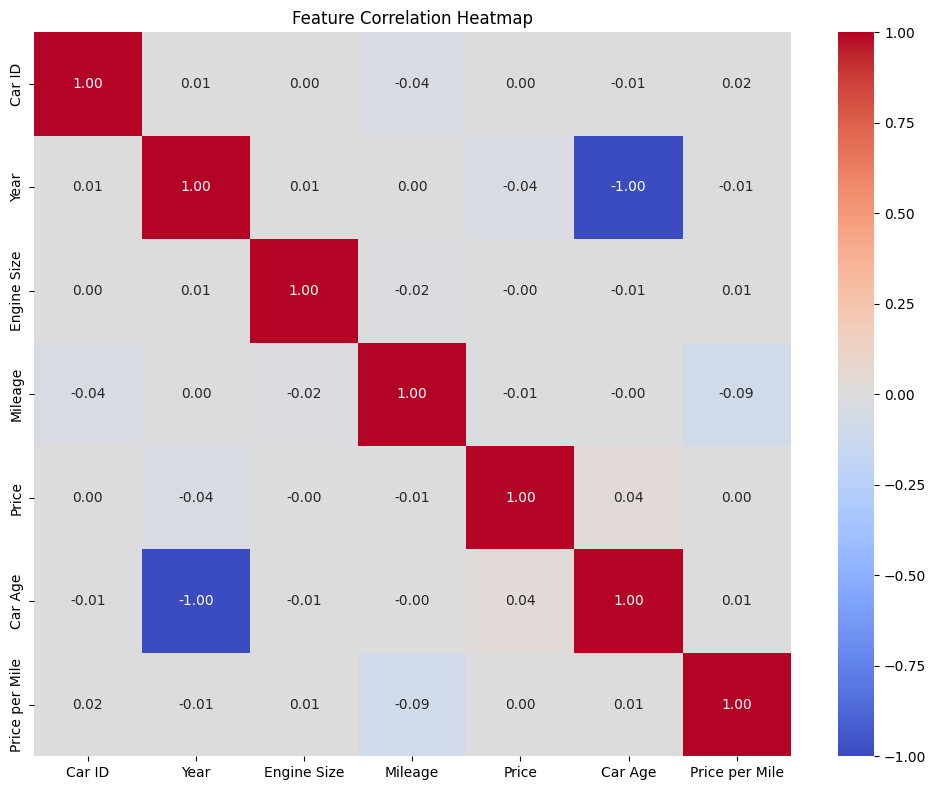

Correlation with Price:
Price             1.000000
Car Age           0.036805
Car ID            0.004650
Price per Mile    0.002388
Engine Size      -0.004420
Mileage          -0.008567
Year             -0.036805
Name: Price, dtype: float64


In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
numerical_features = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

print("Correlation with Price:")
print(correlation_matrix['Price'].sort_values(ascending=False))

Based on the above findings, I decided to also drop Car Age, as it was fully correlated to Year.

In [17]:
numerical_features.drop('Car Age',axis=1)

,Car ID,Year,Engine Size,Mileage,Price,Price per Mile
0,1,2016,2.3,114832,26613.92,0.231762
1,2,2018,4.4,143190,14679.61,0.102518
2,3,2013,4.5,181601,44402.61,0.244505
3,4,2011,4.1,68682,86374.33,1.257579
4,5,2009,2.6,223009,73577.10,0.329927
...,...,...,...,...,...,...
2495,2496,2020,2.4,22650,61384.10,2.709995
2496,2497,2001,5.7,77701,24710.35,0.318014
2497,2498,2021,1.1,272827,29902.45,0.109602
2498,2499,2002,4.5,229164,46085.67,0.201103


## **Step 4: Model Building & Discussion**

In [18]:
df_processed = df.copy()

In [19]:
missing_data = df_processed.isnull().sum()
if missing_data.sum() > 0:
    print("\nMissing data found:")

In [20]:
# Separate features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"Categorical features: {categorical_cols}")
print(f"Numerical features: {numerical_cols}")

Categorical features: ['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model']
Numerical features: ['Car ID', 'Year', 'Engine Size', 'Mileage', 'Car Age', 'Price per Mile']


In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 2000
Test set size: 500


<u> Pre-Process the Data </u>

In [22]:
# Separate numerical and categorical columns
X_train_num = X_train[numerical_cols].copy()
X_test_num = X_test[numerical_cols].copy()

X_train_cat = X_train[categorical_cols].copy()
X_test_cat = X_test[categorical_cols].copy()

# Scale numerical features
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

# Convert back to DataFrame
X_train_num_scaled = pd.DataFrame(
    X_train_num_scaled, 
    columns=numerical_cols,
    index=X_train_num.index
)
X_test_num_scaled = pd.DataFrame(
    X_test_num_scaled, 
    columns=numerical_cols,
    index=X_test_num.index
)

# Encode categorical features
X_train_cat_encoded = pd.get_dummies(X_train_cat, drop_first=True)
X_test_cat_encoded = pd.get_dummies(X_test_cat, drop_first=True)

# Align columns between train and test
X_test_cat_encoded = X_test_cat_encoded.reindex(
    columns=X_train_cat_encoded.columns, 
    fill_value=0
)

# Combine numerical and categorical features
X_train_processed = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_processed = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis=1)

print(f"Processed training set shape: {X_train_processed.shape}")
print(f"Processed test set shape: {X_test_processed.shape}")
print(f"Feature names after preprocessing:")
print(X_train_processed.columns.tolist())

Processed training set shape: (2000, 45)
Processed test set shape: (500, 45)
Feature names after preprocessing:
['Car ID', 'Year', 'Engine Size', 'Mileage', 'Car Age', 'Price per Mile', 'Brand_BMW', 'Brand_Ford', 'Brand_Honda', 'Brand_Mercedes', 'Brand_Tesla', 'Brand_Toyota', 'Fuel Type_Electric', 'Fuel Type_Hybrid', 'Fuel Type_Petrol', 'Transmission_Manual', 'Condition_New', 'Condition_Used', 'Model_5 Series', 'Model_A3', 'Model_A4', 'Model_Accord', 'Model_C-Class', 'Model_CR-V', 'Model_Camry', 'Model_Civic', 'Model_Corolla', 'Model_E-Class', 'Model_Explorer', 'Model_Fiesta', 'Model_Fit', 'Model_Focus', 'Model_GLA', 'Model_GLC', 'Model_Model 3', 'Model_Model S', 'Model_Model X', 'Model_Model Y', 'Model_Mustang', 'Model_Prius', 'Model_Q5', 'Model_Q7', 'Model_RAV4', 'Model_X3', 'Model_X5']


<u>Building and Evaluating Several Models</u>

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(random_state=0),
    'Lasso Regression': Lasso(random_state=0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=0),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=0)
}

In [ ]:
results = {}

for name, model in models.items():
    model.fit(X_train_processed, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train_processed)
    y_pred_test = model.predict(X_test_processed)
    
    # Metrics
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    results[name] = {
        'Train R2': train_r2,
        'Test R2': test_r2,
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Test MAE': test_mae,
        'Model': model
    }
    
    print(f"{name}:")
    print(f"  Train R2: {train_r2:.4f}")
    print(f"  Test R2: {test_r2:.4f}")
    print(f"  Test RMSE: ${test_rmse:.2f}")
    print(f"  Test MAE: ${test_mae:.2f}")

Linear Regression:
  Train R²: 0.0208
  Test R²: -0.0240
  Test RMSE: $28569.01
  Test MAE: $24841.69
Ridge Regression:
  Train R²: 0.0208
  Test R²: -0.0239
  Test RMSE: $28566.74
  Test MAE: $24844.74
Lasso Regression:
  Train R²: 0.0208
  Test R²: -0.0239
  Test RMSE: $28567.90
  Test MAE: $24843.27
Random Forest:
  Train R²: 0.9973
  Test R²: 0.9777
  Test RMSE: $4213.06
  Test MAE: $2084.29
Gradient Boosting:
  Train R²: 0.9837
  Test R²: 0.9668
  Test RMSE: $5142.43
  Test MAE: $3533.08


<u> Hyper Parameter Tuning</u>

Based on my model iteration, I've determined that Random Forest is the model that I would want to try and optimize.

Below is my optimzation using GridSearchCV to try amongst various Random Forest parameters.

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=0)

grid_search = GridSearchCV(
    rf_model, 
    param_grid, 
    cv=5, 
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_processed, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation R²: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test_processed)

print(f"Tuned Model Performance:")
print(f"  Test R2: {r2_score(y_test, y_pred_tuned):.4f}")
print(f"  Test RMSE: ${np.sqrt(mean_squared_error(y_test, y_pred_tuned)):.2f}")
print(f"  Test MAE: ${mean_absolute_error(y_test, y_pred_tuned):.2f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation R²: 0.9790
Tuned Model Performance:
  Test R²: 0.9779
  Test RMSE: $4199.95
  Test MAE: $2078.79


### Closing Thoughts

Because the data was clearly not linear, based off of the visualizations, it makes sense that the Linear Regression model did not perform well. Similarly, Lasso and Ridge aren't necessarily solutions to the nonlinearity so it also makes sense that they didn't do any better. The Random Forest & Gradient Boost, while they showed some signs of overfitting with their high training data scores, dealt with the nonlinear relationship a lot better and was able to produce overall more accurate predictions.